In [19]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Assign 30 features to a NumpyArray 

X = df.iloc[:,2:].values 
y = df.iloc[:,1].values

In [7]:
#Encode label 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [9]:
#Confirm the Label encode
le.transform(['M','B']) 


array([1, 0])

In [10]:
#Split train test 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train , y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [11]:
#Combining transformers and estimators in a pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1)) 
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test,y_test))

Test Accuracy: 0.956


/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
#Stratified K fold cross validation 
import numpy as np 
from sklearn.model_selection import StratifiedKFold 

kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train,y_train) 
scores = [] 
for k,(train,test) in enumerate(kfold): 
    pipe_lr.fit(X_train[train],y_train[train]) 
    score = pipe_lr.score(X_train[test] , y_train[test]) 
    scores.append(score) 
    print('Fold : %2d , Class dist.: %s , Acc :%.3f' % (k+1 , np.bincount(y_train[train]),score))

Fold :  1 , Class dist.: [256 153] , Acc :0.935
Fold :  2 , Class dist.: [256 153] , Acc :0.935
Fold :  3 , Class dist.: [256 153] , Acc :0.957
Fold :  4 , Class dist.: [256 153] , Acc :0.957
Fold :  5 , Class dist.: [256 153] , Acc :0.935
Fold :  6 , Class dist.: [257 153] , Acc :0.956
Fold :  7 , Class dist.: [257 153] , Acc :0.978
Fold :  8 , Class dist.: [257 153] , Acc :0.933
Fold :  9 , Class dist.: [257 153] , Acc :0.956
Fold : 10 , Class dist.: [257 153] , Acc :0.956


/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linea

In [13]:
print('\nCV accuracy: %.3f +/- %3f' % (np.mean(scores) , np.std(scores))) 


CV accuracy: 0.950 +/- 0.013854


In [16]:
#scikit learn K fold scorer 
from sklearn.model_selection import cross_val_score  

scores = cross_val_score(estimator = pipe_lr,X= X_train, y=y_train, cv=10,n_jobs =1) 
print('CV accuracy scores: %s' %scores)

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linea

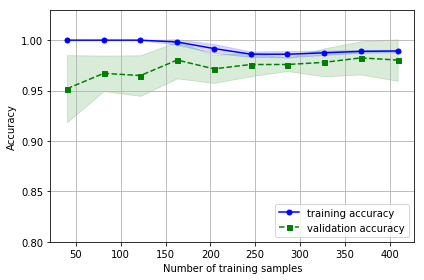

In [20]:
#Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03]) 
plt.tight_layout()
plt.show()

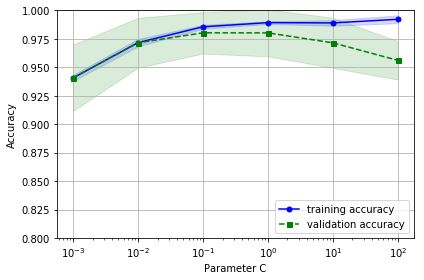

In [21]:
#validation curve

from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [22]:
#Tuning Hyperparametetrs via grid search 

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1)) 

param_range = [0.0001, 0.001 , 0.01,0.1,1.0,10.0,100.0,1000.0] 
param_grid = [{'svc__C' : param_range,
                'svc__kernel' :['linear']},
               {'svc__C' :param_range,
                'svc__gamma' : param_range,
                'svc__kernel' :['rbf']}] 

gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1) 
gs = gs.fit(X_train, y_train)

In [25]:
print(gs.best_score_) 
print(gs.best_params_)

0.9846153846153847
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [26]:
clf = gs.best_estimator_ 
clf.fit(X_train, y_train) 
print('Test accuracy : %.3f' % clf.score(X_test,y_test))

Test accuracy : 0.974


In [27]:
#Nested cross-validation with grid search (Support Vector Machine)

gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=2,n_jobs=-1)  
scores = cross_val_score(gs,X_train,y_train,scoring='accuracy' , cv=5) 
print('CV Accuracy : %.3f +/- %.3f' % (np.mean(scores) , np.std(scores)))

CV Accuracy : 0.974 +/- 0.015


In [35]:
#Nested cross-validation with grid search (Decision Tree Calssifier) 
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=0) 
param_grid_dt = [{'max_depth':[1,2,3,4,5,6,7,8,None]}] 

gs = GridSearchCV(estimator = dt , param_grid=param_grid_dt,scoring='accuracy',cv=2) 
scores = cross_val_score(gs,X_train,y_train,scoring='accuracy' , cv=5)  
print('CV Accuracy : %.3f +/- %.3f' % (np.mean(scores) , np.std(scores))) 


CV Accuracy : 0.934 +/- 0.016
[0.92307692 0.93406593 0.91208791 0.94505495 0.95604396]
